In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import signal
import itertools

In [2]:
#Per Day Sunspot Count (1818-2023)
sun=pd.read_csv("C:/Users/jesto/Desktop/Internship (ISRO)/Jesto Research/Original SUNSPOTS Datasets for Jupyter/SN_d_tot_V2.0.csv")
sun

,Year,Month,Day,date_fraction,sunspots,SD,no_obser,provisional
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
74990,2023,4,26,2023.316,96,14.3,32,0
74991,2023,4,27,2023.319,110,11.9,33,0
74992,2023,4,28,2023.322,109,16.7,26,0
74993,2023,4,29,2023.325,108,21.9,24,0


In [3]:
#removing rows where sunspot number -1
data=sun[sun.sunspots != -1]
data.head(9)

data.loc[(data['Year'] == 1818) & (data['Month'] == 1)]

,Year,Month,Day,date_fraction,sunspots,SD,no_obser,provisional
7,1818,1,8,1818.021,65,10.2,1,1
12,1818,1,13,1818.034,37,7.7,1,1
16,1818,1,17,1818.045,77,11.1,1,1
17,1818,1,18,1818.048,98,12.6,1,1
18,1818,1,19,1818.051,105,13.0,1,1
24,1818,1,25,1818.067,25,6.3,1,1
27,1818,1,28,1818.075,38,7.8,1,1
28,1818,1,29,1818.078,20,5.7,1,1


In [4]:
#Calculating Monthly Sun Spot Numbers
sun_month=data.groupby(["Year","Month"])["sunspots"].mean()
sun_month.head(10)

sun_month.to_csv("sun_month.csv")
sun_month=pd.read_csv("sun_month.csv")

sun_month["year_month"]=sun_month["Year"].astype(str) +"-"+sun_month["Month"].astype(str)
sun_month.head(12)

,Year,Month,sunspots,year_month
0,1818,1,58.125000,1818-1
1,1818,2,37.428571,1818-2
2,1818,3,42.357143,1818-3
3,1818,4,57.523810,1818-4
4,1818,5,88.480000,1818-5
5,1818,6,60.800000,1818-6
6,1818,7,46.761905,1818-7
7,1818,8,52.550000,1818-8
8,1818,9,43.388889,1818-9
9,1818,10,52.772727,1818-10


[Text(0.5, 0, 'Year-Month'),
 Text(0, 0.5, 'No. of Sunspots'),
 Text(0.5, 1.0, ' Original Monthly Sunspot Numbers')]

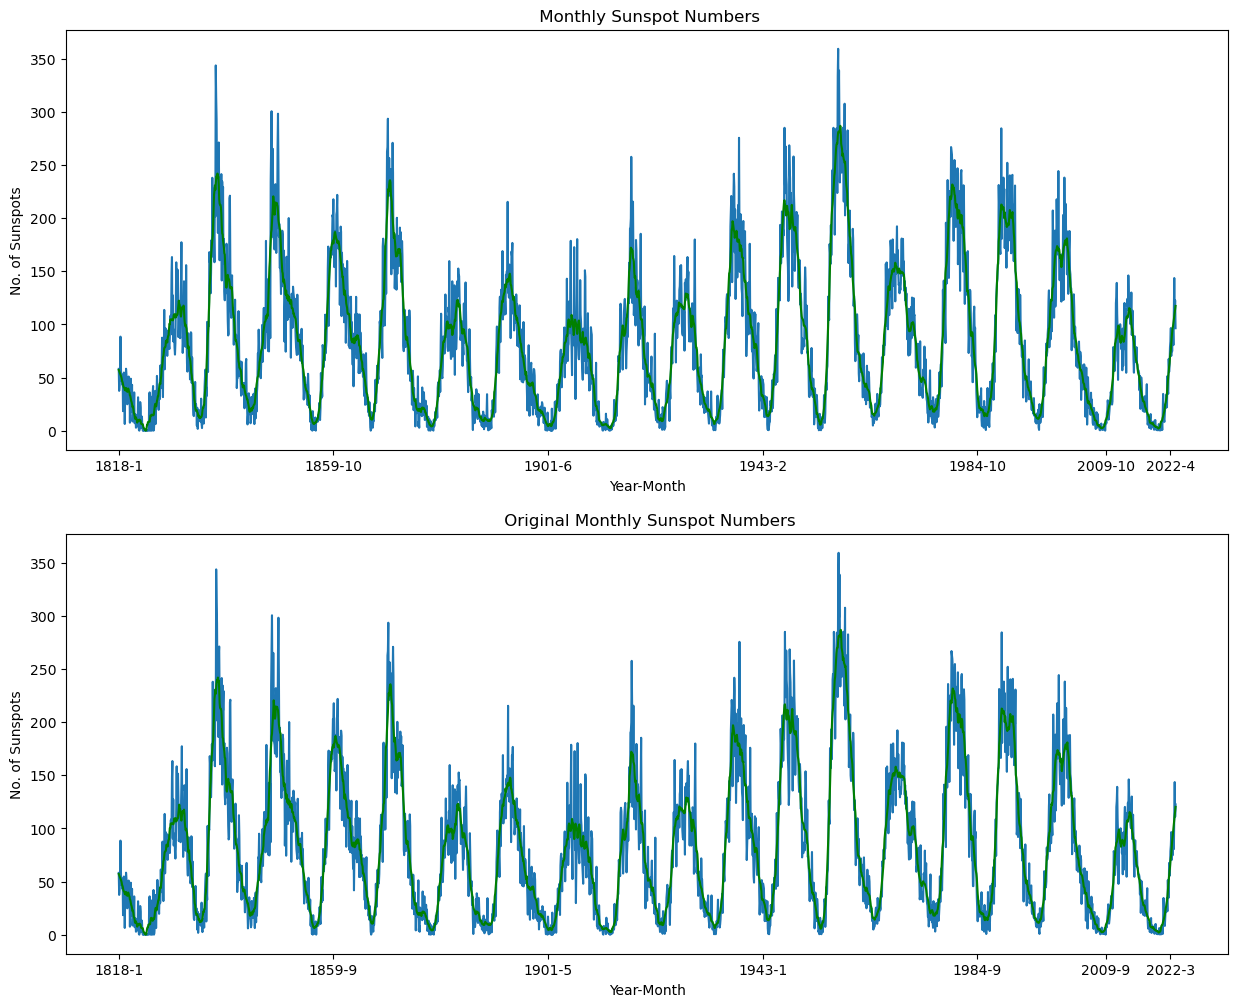

In [7]:
#Mothly Plot

#Calculated Monthly from Daily Sunspots data
fig, axes = plt.subplots(2, 1)

plt.rcParams['figure.figsize'] = [20,15]


sns.lineplot(ax=axes[0],x=sun_month["year_month"],y=sun_month["sunspots"]).set(xticks=[0,500,1000,1500,2000,2300,2450])


yhat_ = signal.savgol_filter(sun_month["sunspots"], 13, 1)
g1=sns.lineplot(ax=axes[0],x=sun_month["year_month"],y=yhat_, color='green')
g1.set(ylabel="No. of Sunspots", xlabel="Year-Month",title=" Monthly Sunspot Numbers")

################################
#ORIGINAL MONTHLY DATA
org_month=pd.read_csv("C:/Users/jesto/Desktop/Internship (ISRO)/Jesto Research/Original SUNSPOTS Datasets for Jupyter/SN_m_tot_V2.0.csv")
org_month

org_month=org_month.iloc[828:] #from 1818

org_month["year_month"]=org_month["Year"].astype(str) +"-"+org_month["Month"].astype(str)
org_month

#plot
sns.lineplot(ax=axes[1],x=org_month["year_month"],y=org_month["sunspots"]).set(xticks=[0,500,1000,1500,2000,2300,2450])

yhat_1 = signal.savgol_filter(org_month["sunspots"], 13, 1)
g2=sns.lineplot(ax=axes[1],x=org_month["year_month"],y=yhat_1, color='green')
g2.set(xlabel="Year-Month",ylabel="No. of Sunspots",title=" Original Monthly Sunspot Numbers")


[Text(0.5, 0, 'Year-Month'),
 Text(0, 0.5, 'No. of Sunspots'),
 Text(0.5, 1.0, ' Original Monthly Sunspot Numbers')]

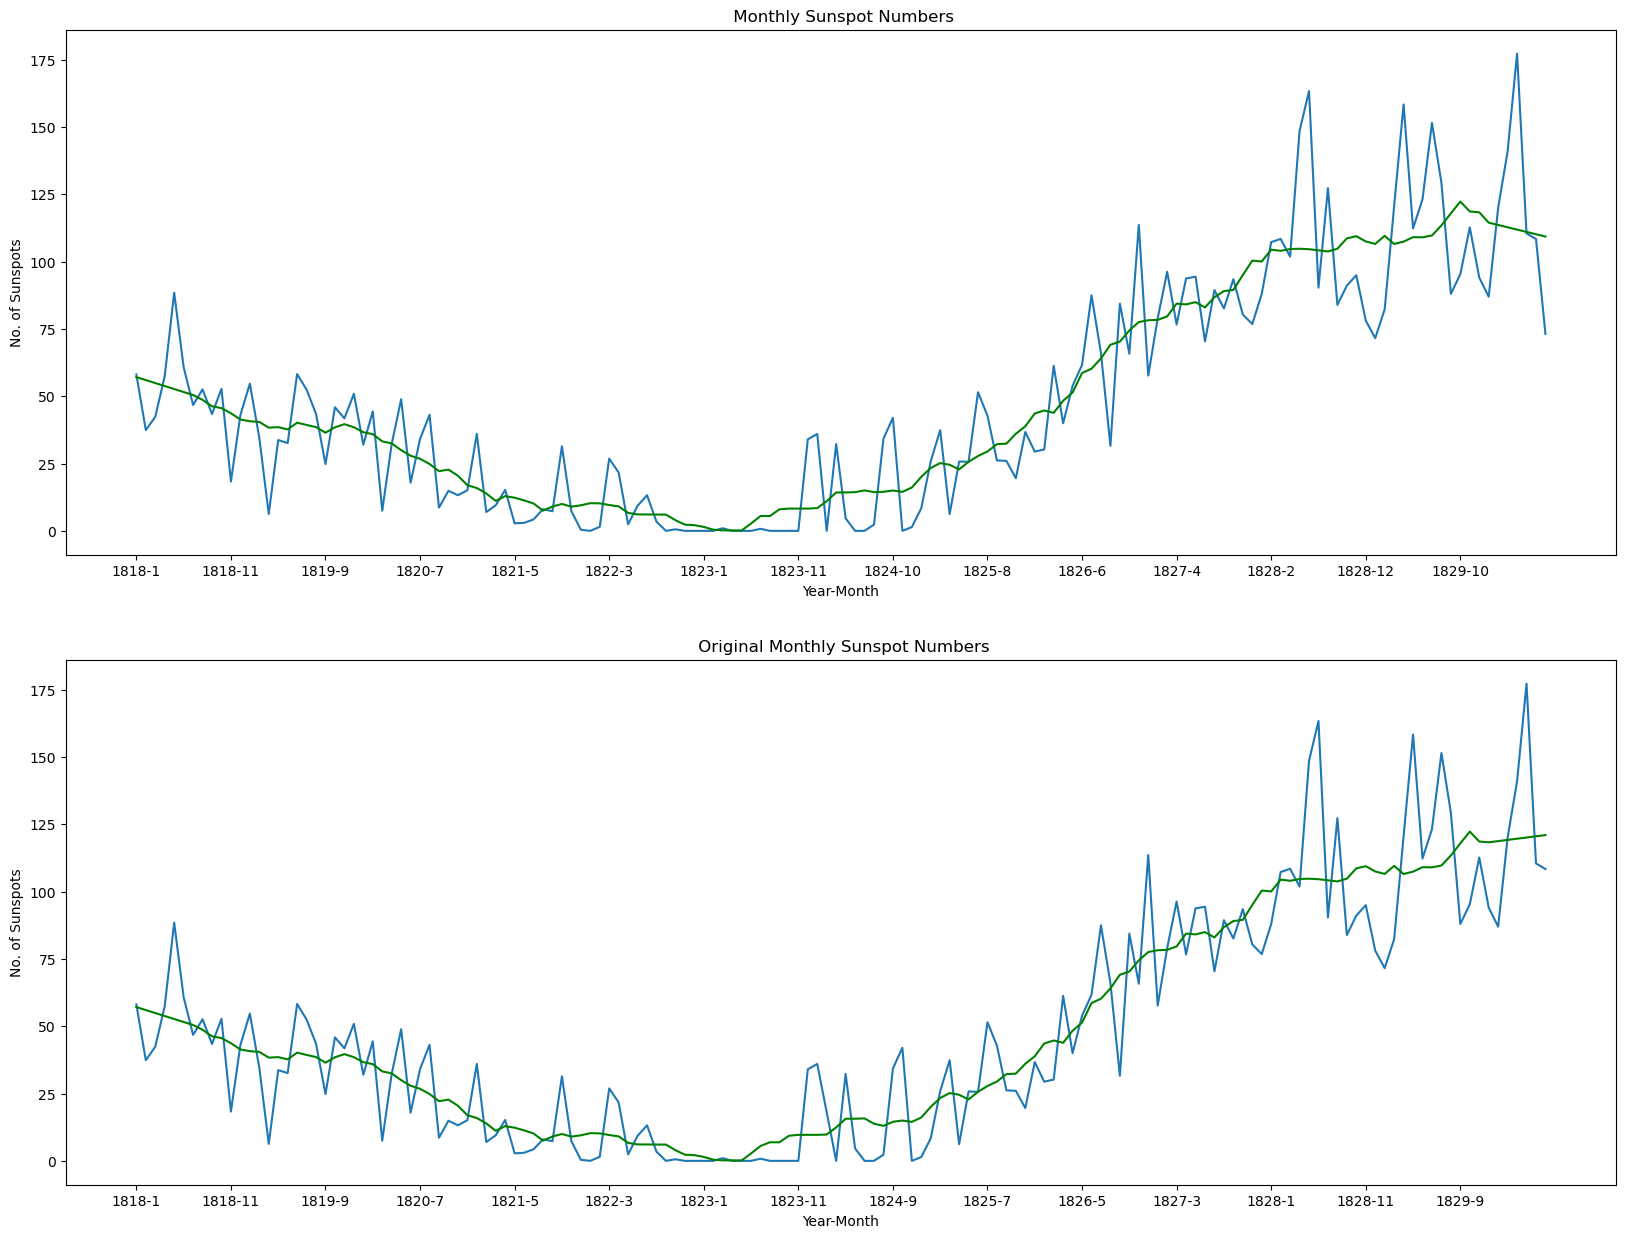

In [8]:
#Mothly Plot for 1818_1-1830_6

#Monthly Sun Spot Numbers
sun_month1=data.groupby(["Year","Month"])["sunspots"].mean()

sun_month1.to_csv("sun_month1.csv")
sun_month1=pd.read_csv("sun_month1.csv")

sun_month1["year_month"]=sun_month1["Year"].astype(str) +"-"+sun_month1["Month"].astype(str)
sun_month1=sun_month1.iloc[0:150]
sun_month1

#Calculated Monthly from Daily Sunspots data
fig, axes = plt.subplots(2, 1)

plt.rcParams['figure.figsize'] = [15,12]


sns.lineplot(ax=axes[0],x=sun_month1["year_month"],y=sun_month1["sunspots"]).set(xticks=range(0,150,10))


yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, 1)
g1=sns.lineplot(ax=axes[0],x=sun_month1["year_month"],y=yhat_, color='green')
g1.set(ylabel="No. of Sunspots", xlabel="Year-Month",title=" Monthly Sunspot Numbers")

########################################

#ORIGINAL MONTHLY DATA
org_month1=pd.read_csv("C:/Users/jesto/Desktop/Internship (ISRO)/Jesto Research/Original SUNSPOTS Datasets for Jupyter/SN_m_tot_V2.0.csv")

org_month1=org_month1.iloc[828:978] #from 1818_1 to 1830_6

org_month1["year_month"]=org_month["Year"].astype(str) +"-"+org_month1["Month"].astype(str)
org_month1

#plot
sns.lineplot(ax=axes[1],x=org_month1["year_month"],y=org_month1["sunspots"]).set(xticks=range(0,150,10))

yhat_1 = signal.savgol_filter(org_month1["sunspots"], 13, 1)
g2=sns.lineplot(ax=axes[1],x=org_month1["year_month"],y=yhat_1, color='green')
g2.set(xlabel="Year-Month",ylabel="No. of Sunspots",title=" Original Monthly Sunspot Numbers")


(0.0, 300.0)

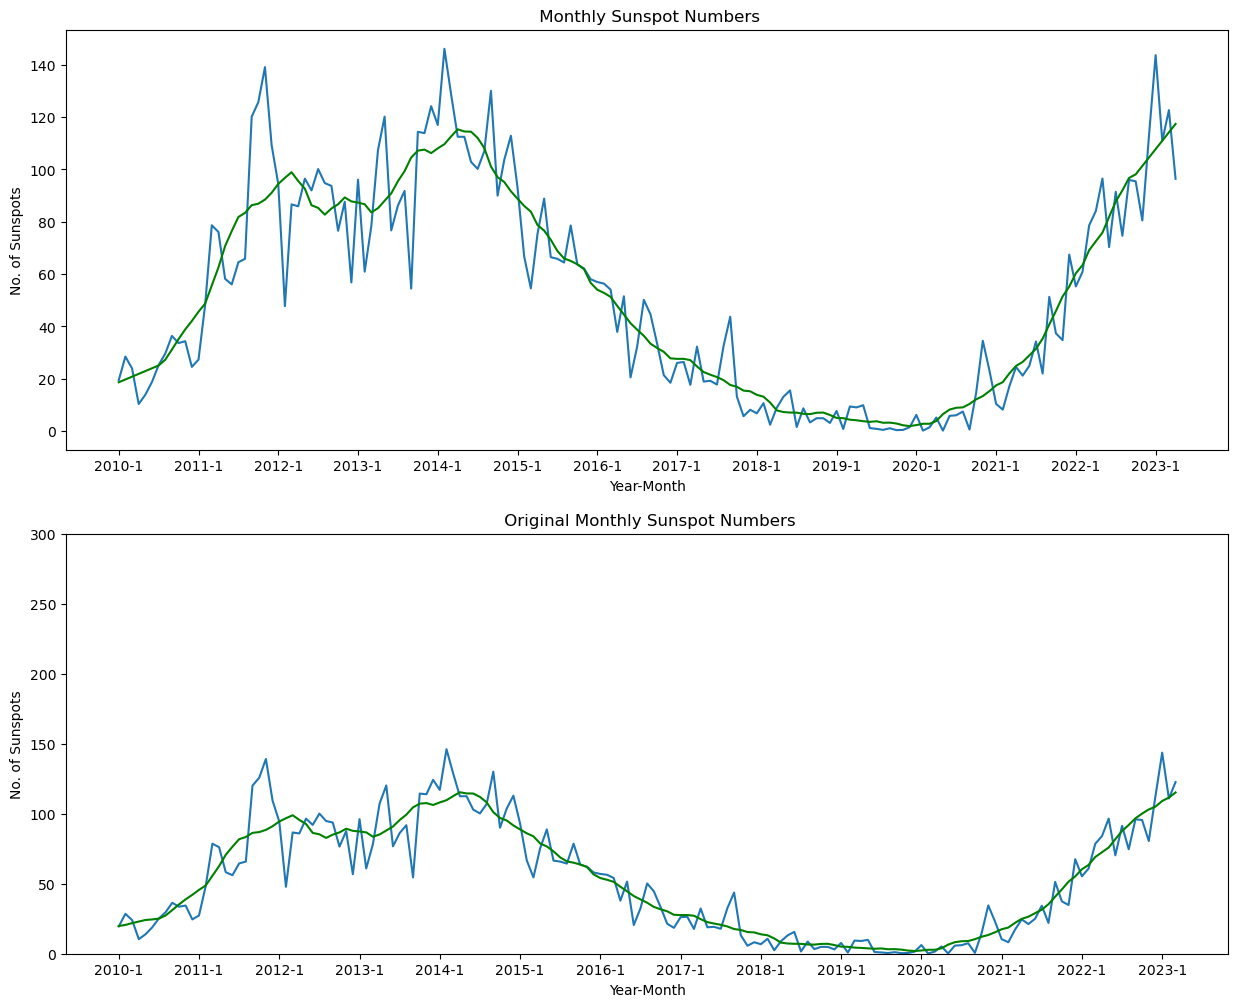

In [9]:
#Mothly Plot for 2010_1 to 2023_3

#Monthly Sun Spot Numbers
sun_month1=data.groupby(["Year","Month"])["sunspots"].mean()

sun_month1.to_csv("sun_month1.csv")
sun_month1=pd.read_csv("sun_month1.csv")

sun_month1["year_month"]=sun_month1["Year"].astype(str) +"-"+sun_month1["Month"].astype(str)
sun_month1=sun_month1.iloc[2303:]
sun_month1

#Calculated Monthly from Daily Sunspots data
fig, axes = plt.subplots(2, 1)

plt.rcParams['figure.figsize'] = [15,12]


sns.lineplot(ax=axes[0],x=sun_month1["year_month"],y=sun_month1["sunspots"]).set(xticks=range(0,300,12))


yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, 1)
g1=sns.lineplot(ax=axes[0],x=sun_month1["year_month"],y=yhat_, color='green')
g1.set(ylabel="No. of Sunspots", xlabel="Year-Month",title=" Monthly Sunspot Numbers")
plt.ylim(0, 300)
########################################

#ORIGINAL MONTHLY DATA
org_month1=pd.read_csv("C:/Users/jesto/Desktop/Internship (ISRO)/Jesto Research/Original SUNSPOTS Datasets for Jupyter/SN_m_tot_V2.0.csv")
org_month1

org_month1=org_month1.iloc[3132:] #from 2010_1 to 2023_3

org_month1["year_month"]=org_month["Year"].astype(str) +"-"+org_month1["Month"].astype(str)
org_month1

#plot
sns.lineplot(ax=axes[1],x=org_month1["year_month"],y=org_month1["sunspots"]).set(xticks=range(0,300,12))

yhat_1 = signal.savgol_filter(org_month1["sunspots"], 13, 1,mode='nearest')
g2=sns.lineplot(ax=axes[1],x=org_month1["year_month"],y=yhat_1, color='green')
g2.set(xlabel="Year-Month",ylabel="No. of Sunspots",title=" Original Monthly Sunspot Numbers")
plt.ylim(0, 300)

[Text(0, 0.5, 'No. of Sunspots'),
 Text(0.5, 0, 'Year-Month'),
 Text(0.5, 1.0, ' Monthly Sunspot Numbers')]

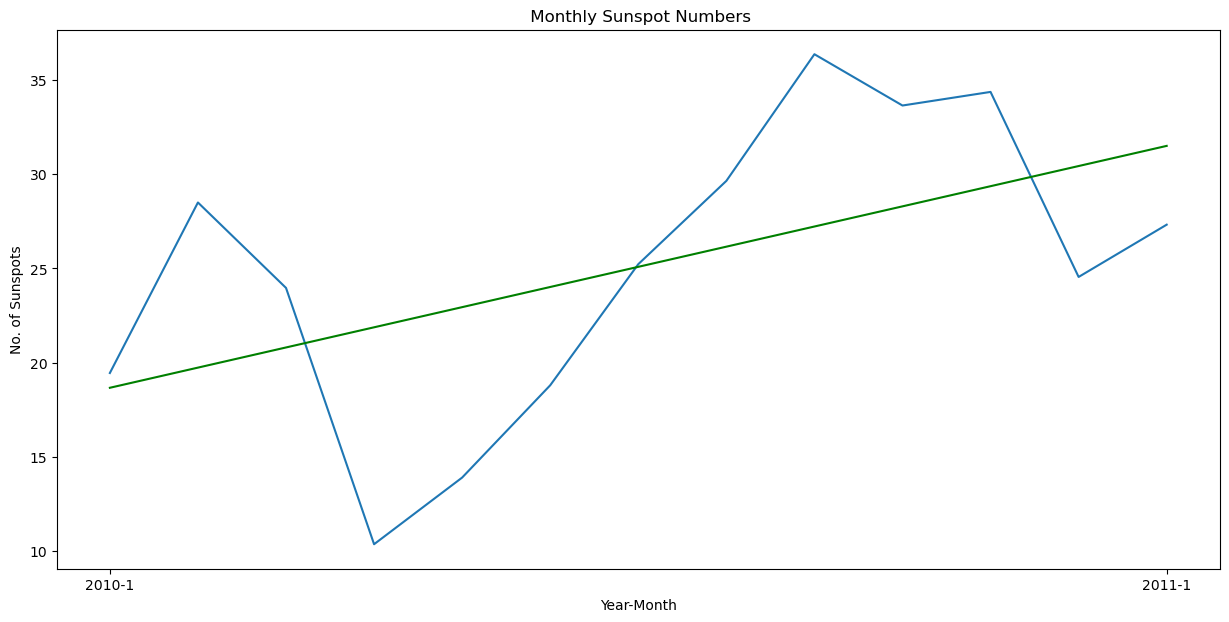

In [10]:
#13 MONTH CYCLE FITTING (One 13 month cycle)

#Monthly Sun Spot Numbers
sun_month=data.groupby(["Year","Month"])["sunspots"].mean()

sun_month.to_csv("sun_month1.csv")
sun_month=pd.read_csv("sun_month1.csv")

sun_month["year_month"]=sun_month["Year"].astype(str) +"-"+sun_month["Month"].astype(str)

#Plot Dimensions
plt.rcParams['figure.figsize'] = [15,7]

###############################################
#FITTING FOR THE FIRST 13 MONTHS
###############################################

#13 months from 2010-1 to 2011-1
sun_month1=sun_month.iloc[2303:2316] #13 months data considered
sun_month1

sns.lineplot(x=sun_month1["year_month"],y=sun_month1["sunspots"]).set(xticks=range(0,300,12))

yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, 1)
g1=sns.lineplot(x=sun_month1["year_month"],y=yhat_, color='green')
g1.set(ylabel="No. of Sunspots", xlabel="Year-Month",title=" Monthly Sunspot Numbers")



In [11]:
sun_month.iloc[2000:]

,Year,Month,sunspots,year_month
2000,1984,10,12.612903,1984-10
2001,1984,11,26.466667,1984-11
2002,1984,12,21.387097,1984-12
2003,1985,1,17.838710,1985-1
2004,1985,2,20.714286,1985-2
...,...,...,...,...
2458,2022,12,112.806452,2022-12
2459,2023,1,143.645161,2023-1
2460,2023,2,110.928571,2023-2
2461,2023,3,122.645161,2023-3


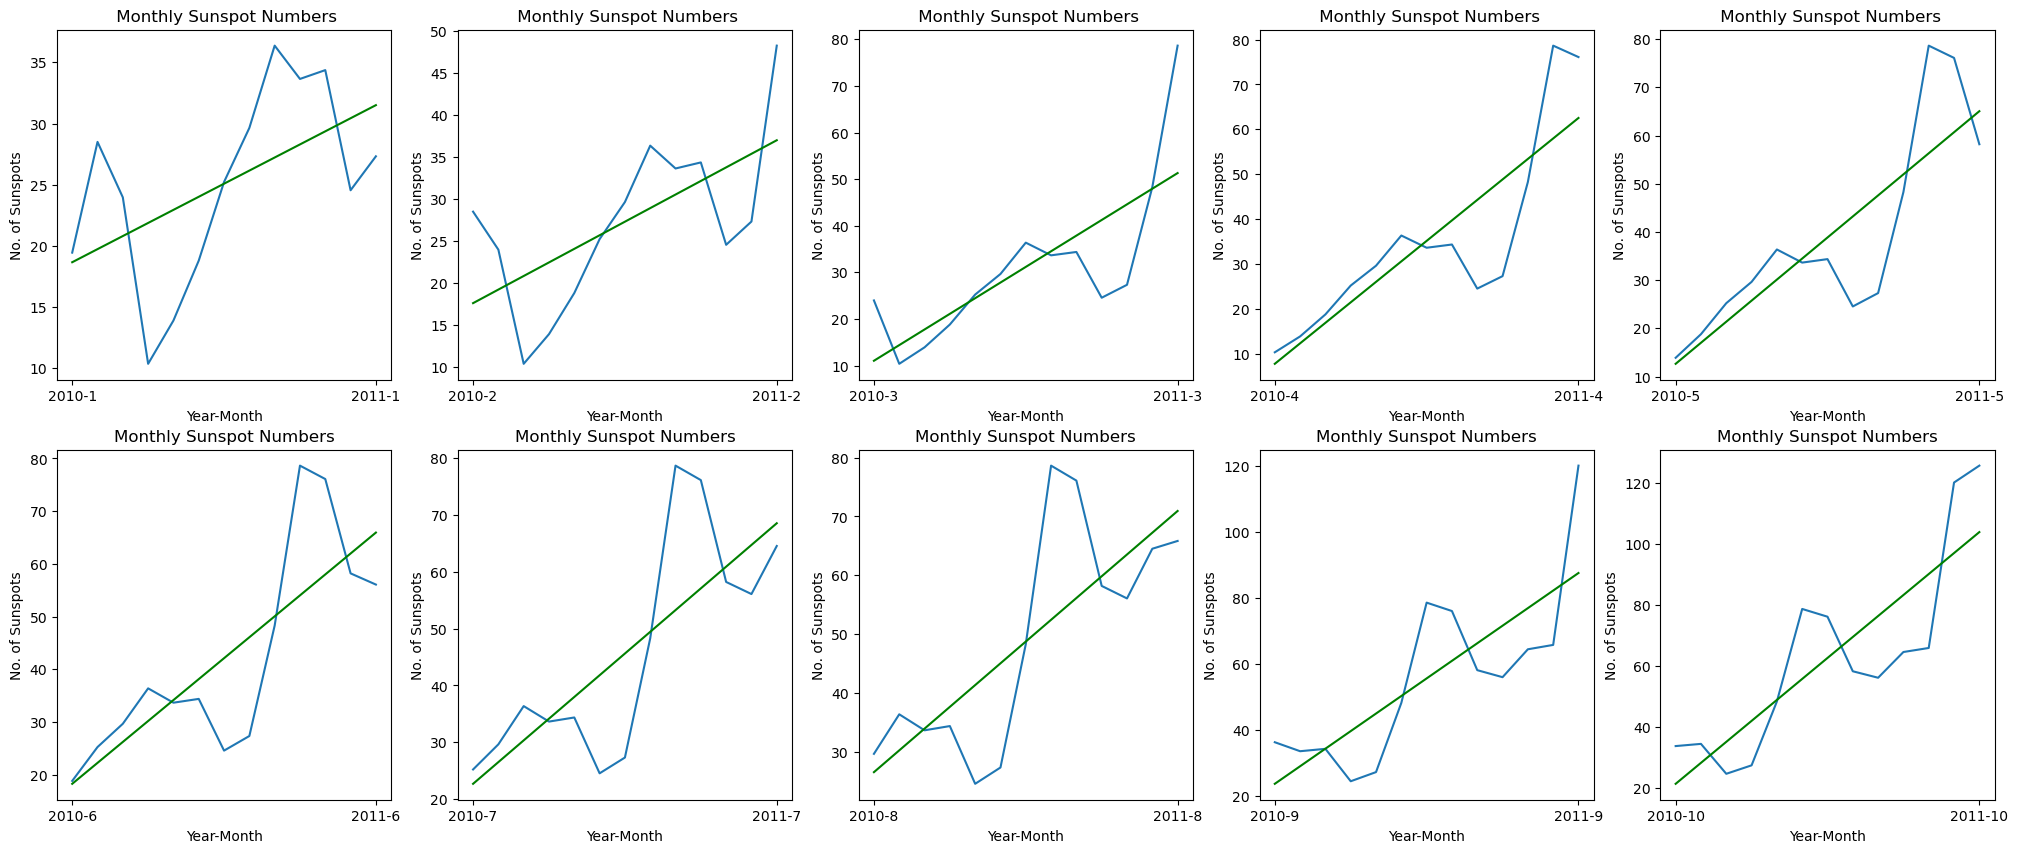

In [12]:
#13 month smoothed data progression (Degree 1)

sun_month=data.groupby(["Year","Month"])["sunspots"].mean()

sun_month.to_csv("sun_month1.csv")
sun_month=pd.read_csv("sun_month1.csv")

sun_month["year_month"]=sun_month["Year"].astype(str) +"-"+sun_month["Month"].astype(str)

#Plot Dimensions

plt.rcParams['figure.figsize'] = [25,10]
fig, axes = plt.subplots(2, 5)

#The plot
for i in range(0,5):

    #13 months from 2010-i to 2011-i
    sun_month1=sun_month.iloc[2303+i:2316+i] #13 months data considered
    sun_month1

    sns.lineplot(ax=axes[0][i],x=sun_month1["year_month"],y=sun_month1["sunspots"]).set(xticks=range(0,13,12))

    yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, 1)
    g1=sns.lineplot(ax=axes[0][i],x=sun_month1["year_month"],y=yhat_, color='green')
    g1.set(ylabel="No. of Sunspots", xlabel="Year-Month",title=" Monthly Sunspot Numbers")

for i in range(0,5):

    #13 months from 2010-i to 2011-i
    sun_month1=sun_month.iloc[2308+i:2321+i] #13 months data considered 2308-2321
    sun_month1

    sns.lineplot(ax=axes[1][i],x=sun_month1["year_month"],y=sun_month1["sunspots"]).set(xticks=range(0,13,12))

    yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, 1)
    g1=sns.lineplot(ax=axes[1][i],x=sun_month1["year_month"],y=yhat_, color='green')
    g1.set(ylabel="No. of Sunspots", xlabel="Year-Month",title="Monthly Sunspot Numbers")



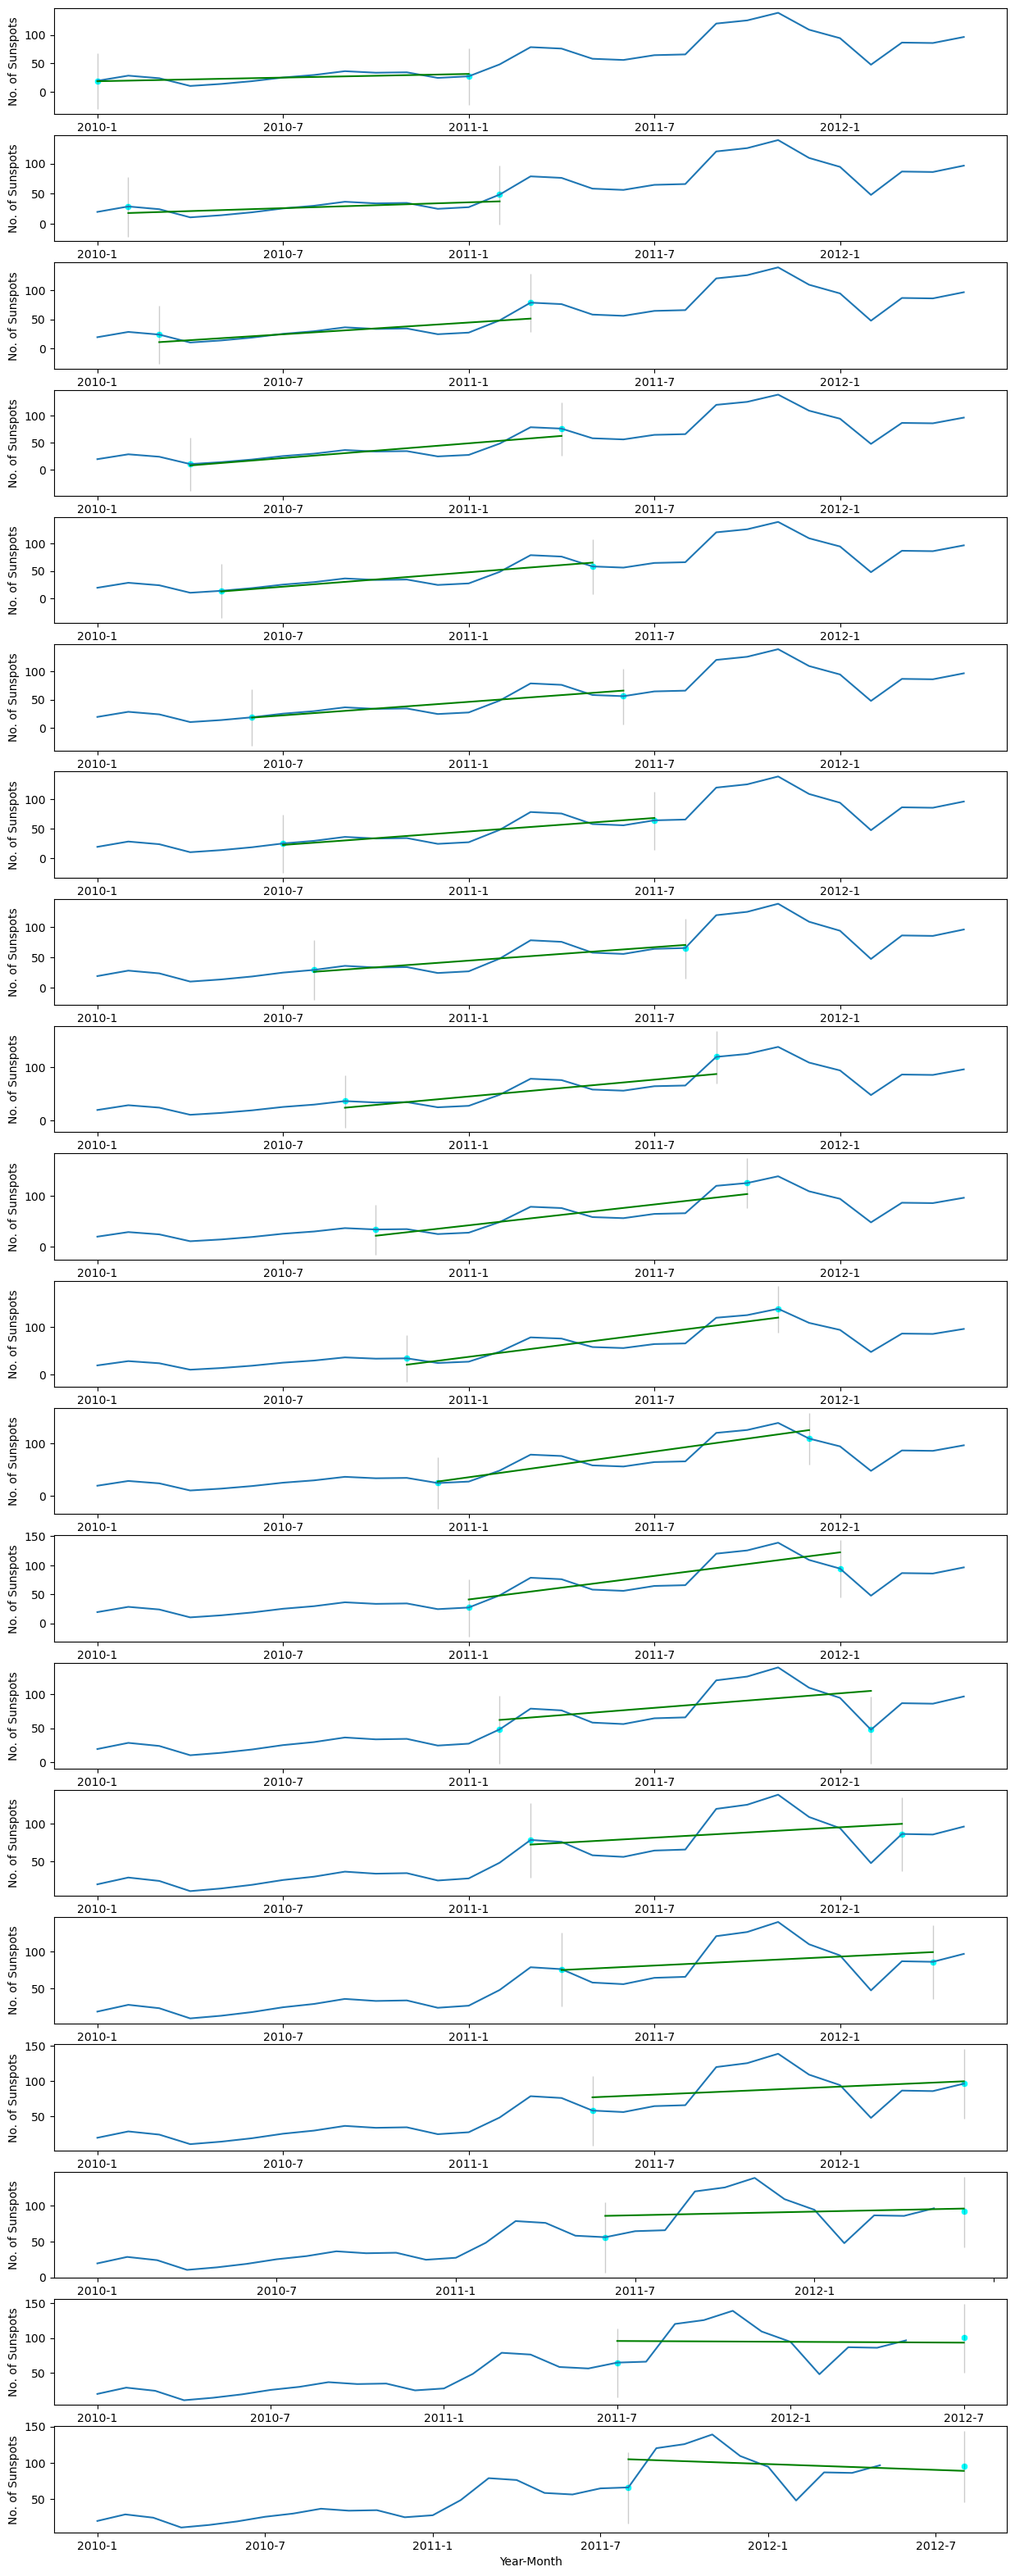

In [17]:
#13 month smoothed data progression (Degree 1)

sun_month=data.groupby(["Year","Month"])["sunspots"].mean()

sun_month.to_csv("sun_month1.csv")
sun_month=pd.read_csv("sun_month1.csv")

sun_month["year_month"]=sun_month["Year"].astype(str) +"-"+sun_month["Month"].astype(str)

#Plot Dimensions

plt.rcParams['figure.figsize'] = [15,40]
fig, axes = plt.subplots(20,1)

#The Plot
for i in range(0,20):

    #13 months from 2010-i to 2011-i ;i=1,2,..
    sun_month1=sun_month.iloc[2303+i:2316+i] #13 months data considered
    sun_month1
    
    #line plot
    sns.lineplot(ax=axes[i],x=sun_month.iloc[2303:2332]["year_month"],y=sun_month.iloc[2303:2332]["sunspots"]).set(xticks=range(0,39,6))
    
    #scatter plot
    sns.scatterplot(ax=axes[i],x=[i],y=sun_month1["sunspots"][2303+i],color='cyan')
    sns.scatterplot(ax=axes[i],x=[12+i],y=sun_month1["sunspots"][2315+i],color='cyan')
    #sns.scatterplot(ax=axes[i],x=[6+i],y=sun_month1["sunspots"][2309+i],color='red')
    
    #boundaries
    sns.lineplot(ax=axes[i],x=list(itertools.repeat(i, 2)),y=(sun_month1["sunspots"][2303+i]+range(-50,100,99)),color='black')
    sns.lineplot(ax=axes[i],x=list(itertools.repeat(i+12, 2)),y=(sun_month1["sunspots"][2315+i]+range(-50,100,99)),color='black')
    
    #fitting the curve
    yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, 1)
    g1=sns.lineplot(ax=axes[i],x=sun_month1["year_month"],y=yhat_, color='green')
    g1.set(ylabel="No. of Sunspots", xlabel="Year-Month") #,title=" Monthly Sunspot Numbers"
   


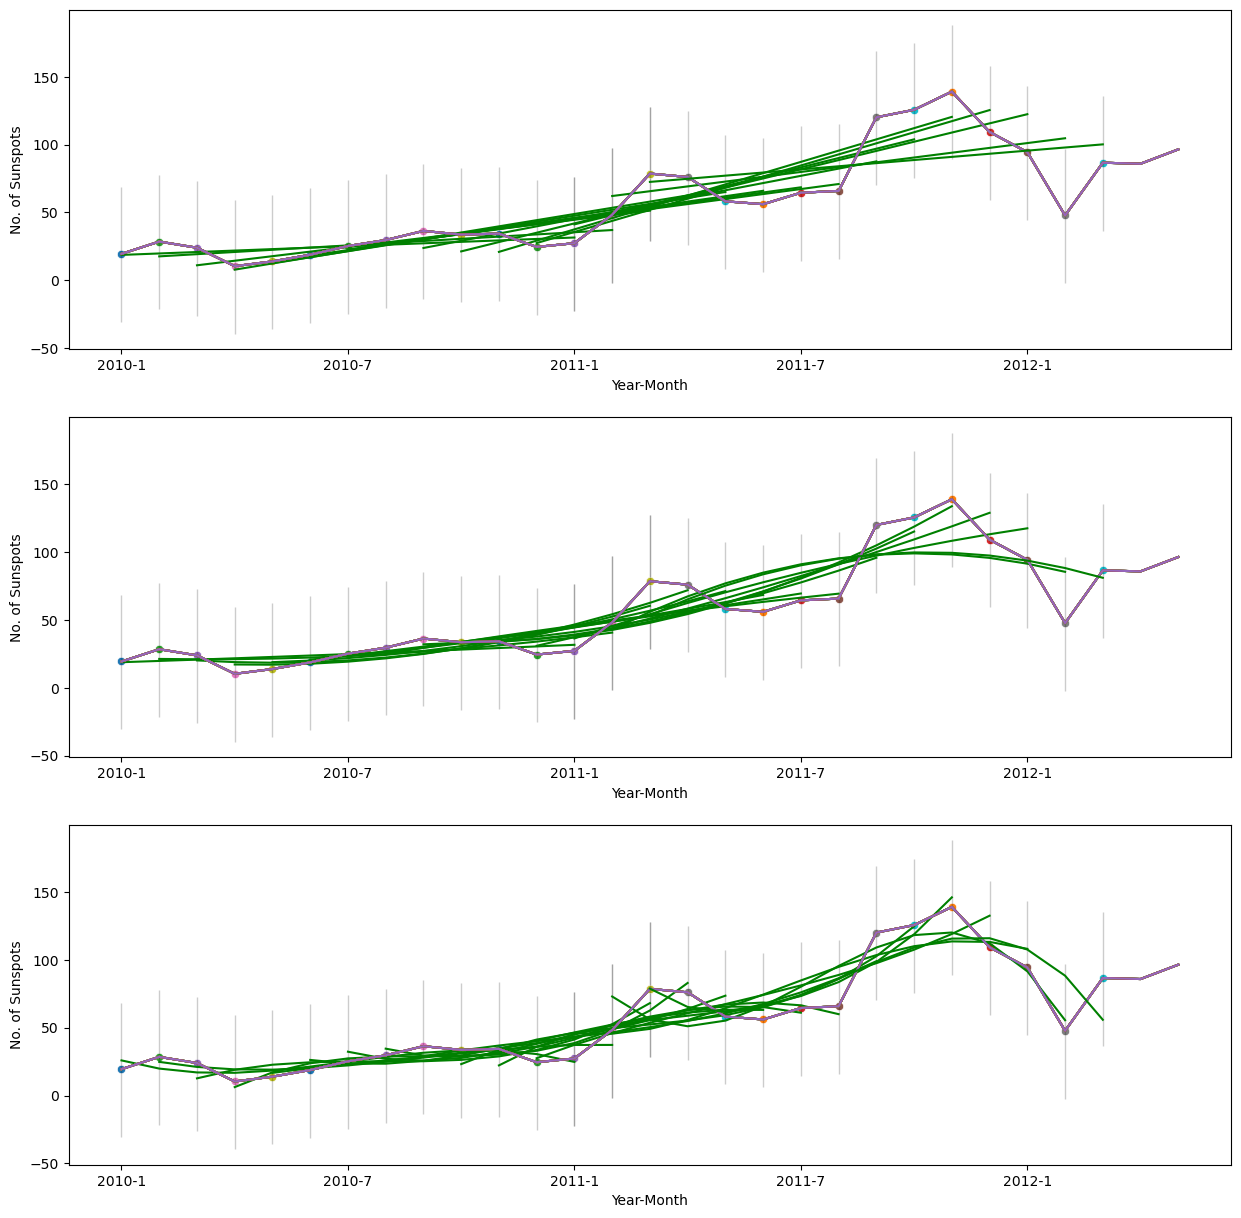

In [18]:
#13 month smoothed data progression (Degree 1)

sun_month=data.groupby(["Year","Month"])["sunspots"].mean()

sun_month.to_csv("sun_month1.csv")
sun_month=pd.read_csv("sun_month1.csv")

sun_month["year_month"]=sun_month["Year"].astype(str) +"-"+sun_month["Month"].astype(str)

#Plot Dimensions

plt.rcParams['figure.figsize'] = [15,15]
fig, axes = plt.subplots(3,1)



#The Plot
for j in range(0,3):
    
    for i in (range(0,15)):
        #13 months from 2010-i to 2011-i ;i=1,2,..
        sun_month1=sun_month.iloc[2303+i:2316+i] #13 months data considered
        sun_month1

        #line plot
        sns.lineplot(ax=axes[j],x=sun_month.iloc[2303:2335]["year_month"],y=sun_month.iloc[2303:2332]["sunspots"]).set(xticks=range(0,39,6))
        
        #scatter plot
        sns.scatterplot(ax=axes[j],x=[i],y=sun_month1["sunspots"][2303+i])
        sns.scatterplot(ax=axes[j],x=[12+i],y=sun_month1["sunspots"][2315+i])
      
        #boundaries
        sns.lineplot(ax=axes[j],x=list(itertools.repeat(i, 2)),y=(sun_month1["sunspots"][2303+i]+range(-50,100,99)),color='black')
        sns.lineplot(ax=axes[j],x=list(itertools.repeat(12+i, 2)),y=(sun_month1["sunspots"][2315+i]+range(-50,100,99)),color='black')

        #fitting the curve
        yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, j+1)
        g1=sns.lineplot(ax=axes[j],x=sun_month1["year_month"],y=yhat_, color='green')
        g1.set(ylabel="No. of Sunspots", xlabel="Year-Month") #,title=" Monthly Sunspot Numbers"



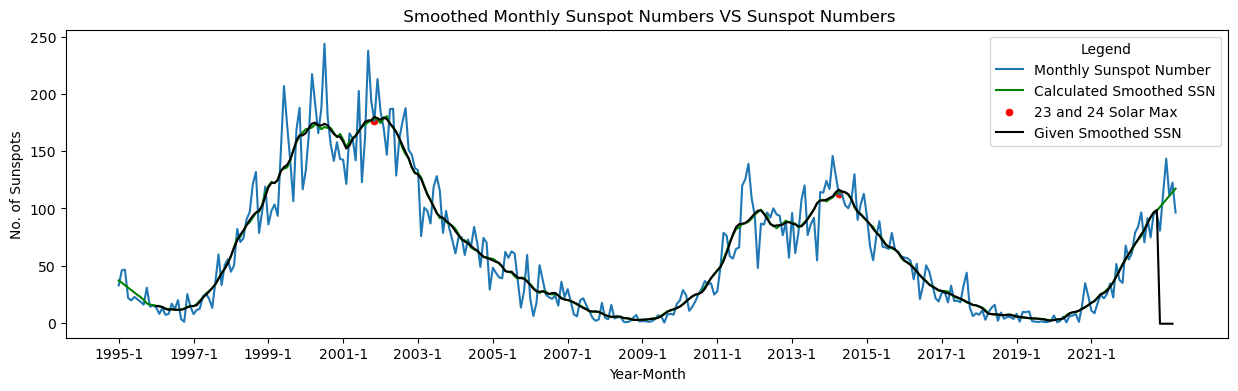

In [25]:
#Mothly Plot for 1996_1 to 2023_3

#Monthly Sun Spot Numbers
sun_month1=data.groupby(["Year","Month"])["sunspots"].mean()

sun_month1.to_csv("sun_month1.csv")
sun_month1=pd.read_csv("sun_month1.csv")

sun_month1["year_month"]=sun_month1["Year"].astype(str) +"-"+sun_month1["Month"].astype(str)
sun_month1=sun_month1.iloc[2123:] #From 1996 to 2023
sun_month1

#Calculated Monthly from Daily Sunspots data
#fig, axes = plt.subplots(2, 1)

plt.rcParams['figure.figsize'] = [15,4]

#SUNSPOT NUMBERS
sns.lineplot(x=sun_month1["year_month"],y=sun_month1["sunspots"]).set(xticks=range(0,330,24))

#SMOOTHED USING SAVGOL METHOD
yhat_ = signal.savgol_filter(sun_month1["sunspots"], 13, 1)
g1=sns.lineplot(x=sun_month1["year_month"],y=yhat_, color='green')

#The solar maximum for cycle 23
c=sun_month1[sun_month1["year_month"]=="2001-11"].index.values[0]

sns.scatterplot(x=[sun_month1["year_month"].iloc[82]],y=[sun_month1["sunspots"].iloc[82]],color='red')

########################################

#SMOOTHED MONTHLY DATA(FROM NASA)
org_month1=pd.read_csv("C:/Users/jesto/Desktop/Internship (ISRO)/Jesto Research/Original SUNSPOTS Datasets for Jupyter/SN_ms_tot_V2.0.csv")
org_month1

org_month1=org_month1.iloc[2964:] #from 1996_1 to 2023_3

org_month1["year_month"]=org_month["Year"].astype(str) +"-"+org_month1["Month"].astype(str)
org_month1

#plot
g2=sns.lineplot(x=org_month1["year_month"],y=org_month1["sunspots"], color='black')
g2.set(xlabel="Year-Month",ylabel="No. of Sunspots",title=" Smoothed Monthly Sunspot Numbers VS Sunspot Numbers")
#plt.ylim(0, 150)

sns.scatterplot(x=[sun_month1["year_month"].iloc[231]],y=[sun_month1["sunspots"].iloc[231]],color='red')
#sns.scatterplot(x=[org_month1["year_month"].iloc[219]],y=[org_month1["sunspots"].iloc[219]],color='red')

plt.legend(title='Legend', loc='upper right', labels=['Monthly Sunspot Number', 'Calculated Smoothed SSN','23 and 24 Solar Max','Given Smoothed SSN'])